# Section 11: Python for Data Visualization - Plotly and Cufflinks

# 01-Plotly and Cufflinks


In [1]:
## Introduction 

## We are going to learn of the background of Plotly and Cufflinks which will allow us to create Interactive 
## Data visualizations. 

## - Plotly is an interactive visualization library 
## - Cufflinks connects pltly with Pandas 

##Installing plotly with pip: 

## pip install plotly -> Not available for the conda install 
## pip install cufflinks 

In [2]:
import pandas as pd 
import numpy as np 
from plotly import __version__
%matplotlib inline

In [3]:
print(__version__)

4.2.1


In [4]:
import cufflinks as cf

In [5]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

In [6]:
init_notebook_mode(connected = True) ## Connects JavaScript to our notebook, plotly connects pandas a Python to an
                                     ## interactive JavaScript library 

In [7]:
cf.go_offline() ##This method allows us to use cufflinks online

In [8]:
df = pd.DataFrame(np.random.randn(100,4), columns = 'A B C D'.split())

In [9]:
df.head()

,A,B,C,D
0,-0.065428,-0.841137,-0.796672,-0.167683
1,-0.498332,0.846594,0.647773,1.211881
2,-0.393267,-2.076924,0.483152,-0.144385
3,-0.106164,-0.670063,0.364444,-1.255154
4,-0.262075,-0.571885,1.700714,0.472796


In [10]:
df2 = pd.DataFrame({'Category':['A', 'B', 'C'], 'Values': [32,43,50]})

In [11]:
df2 ##Used later for a bar plot

,Category,Values
0,A,32
1,B,43
2,C,50


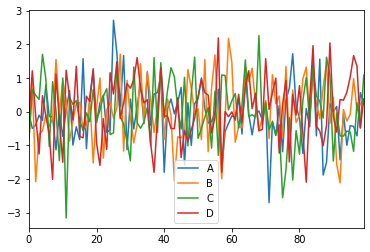

In [12]:
### Using cufflinks and iplot 

df.plot() ##Plotted with pandas

In [13]:
## We can create an interactive plot using the iplot method, this is a very simple example
df.iplot()

In [14]:
## Now, lets use iplot to create other types of plots: 

## Ex.1 Scatterplot

df.iplot(kind = 'scatter', x = 'A', y = 'B', mode = 'markers', size = 20) 
                                             ## plotly is going to try and create a line by default 
                                             ## We can pass the parameter mode = 'markers' to avoid this
                                             ## Use the size parameter to obtain larger markers 

In [15]:
## Ex.2 Barplot 

df2.iplot(kind = 'bar', x = 'Category', y = 'Values')

In [16]:
### Ex.3 - Sometimes, our data is not going to be conveniently placed -> We can use a groupby + aggregate function 
##         to obtain a convenient form where it makes sense to use a barplot. 

df.sum().iplot(kind = 'bar')

In [17]:
## Ex.4 Boxplots 

## We can us df directly -> Boxplots will automatically do the aggregation for the distribution 

df.iplot(kind = 'box')

In [18]:
## Ex.5 3D Surfaces plots 

df3 = pd.DataFrame({'x':[1,2,3,4,5], 'y':[10,20,30,20,10], 'z':[5,4,3,2,1]})

In [19]:
df3

,x,y,z
0,1,10,5
1,2,20,4
2,3,30,3
3,4,20,2
4,5,10,1


In [20]:
df3.iplot(kind = 'surface', colorscale = 'rdylbu')

## We can change the colors of our plot by callind the colorscale parameter -> Do not match up exactly with matplotlib's
## colormaps

In [21]:
 ## Ex.6 Histograms 
    
df['A'].iplot(kind = 'hist', bins = 50) ##We can also pass the whole dataframe and toggle the desired columns 

In [22]:
df.iplot(kind = 'hist')

In [23]:
 ## Ex.7 Spread 

df[['A','B']].iplot(kind = 'spread') ##Useful to see the spread when analyzing stock data

In [24]:
## Ex 8 - Bubble plot -> Similar to a scatter plot. Scatter points sizes will change depending on other variables 

df.iplot(kind = 'bubble', x = 'A', y = 'B', size = 'C') ## Specify the size of the points based on column 'C'
                                                        ## Used in applications such as comparing World GDP vs Population
                                                        ## Happiness factors -> UN reports
                                                

In [25]:
## Ex.9 Scatter Matrix -> Very similar to seaborn's pairplot -> Creates a scatter matrix of all the numerical columns
                    ##  there are. Be careful when using very large datasets -> May crash the Python Kernel

df.scatter_matrix()

In [26]:
### More details in the cufflinks github page 

## Technical analysis capability available on cufflinks -> Used for financial analysis  